In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini oku
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [14]:
df['HeartDisease'].value_counts(normalize=True) * 100

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

In [13]:
df.duplicated().sum()

0

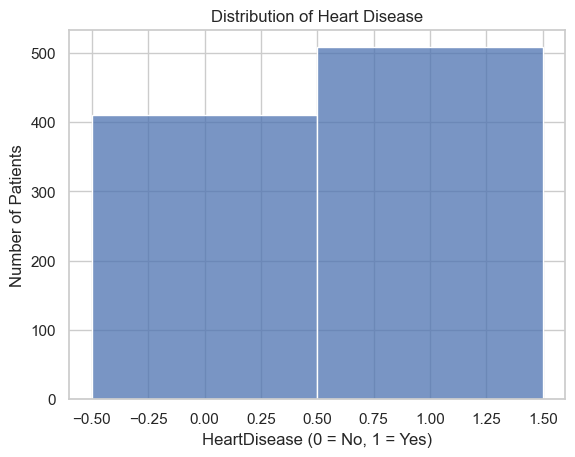

In [12]:
sns.histplot(data=df, x='HeartDisease', discrete=True, bins=2)
plt.title("Distribution of Heart Disease")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()

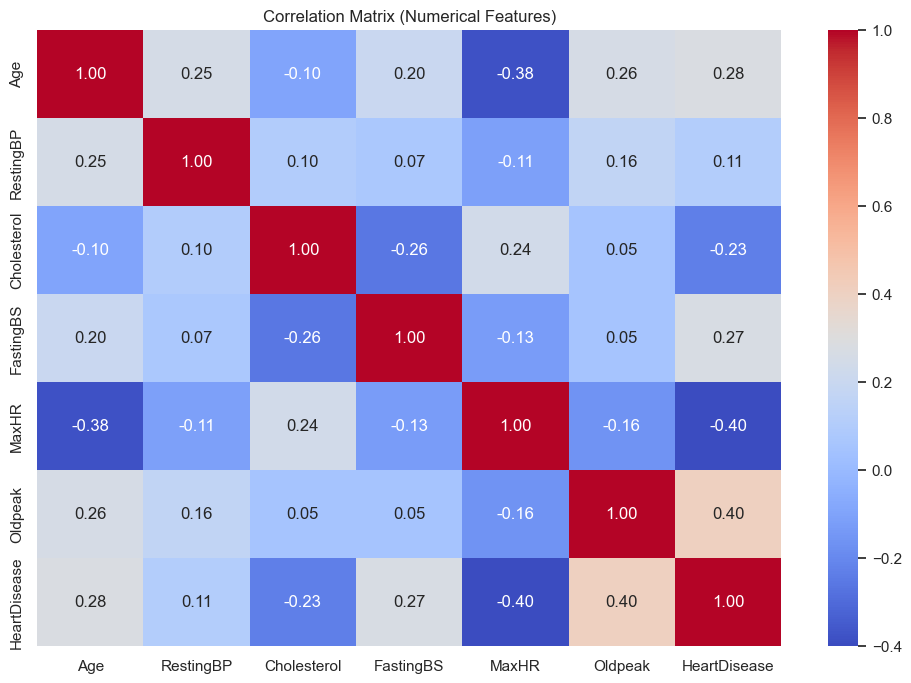

In [16]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Draw correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()



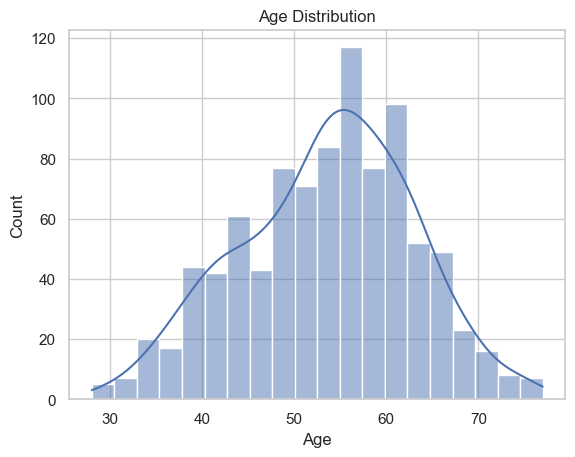

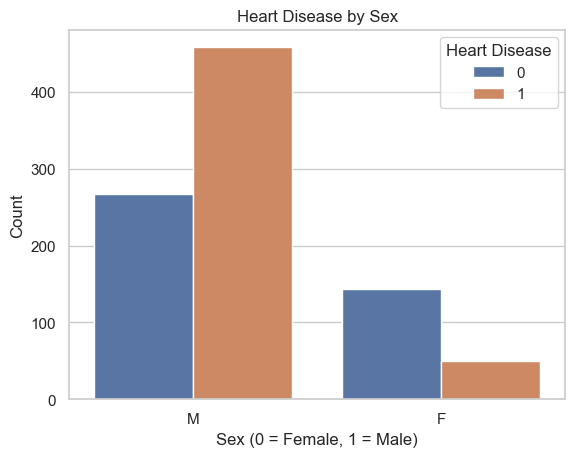

In [17]:
# Distribution of Age
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# HeartDisease by Sex
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title("Heart Disease by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


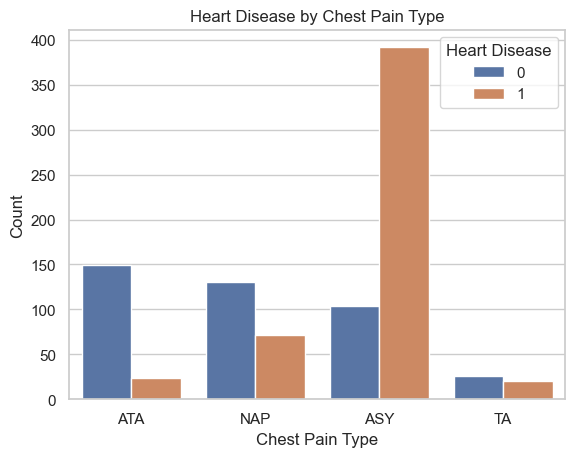

In [18]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


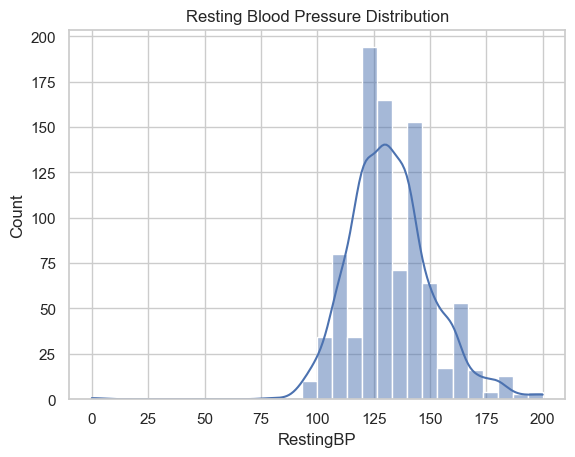

In [19]:
sns.histplot(data=df, x='RestingBP', bins=30, kde=True)
plt.title("Resting Blood Pressure Distribution")
plt.xlabel("RestingBP")
plt.ylabel("Count")
plt.show()


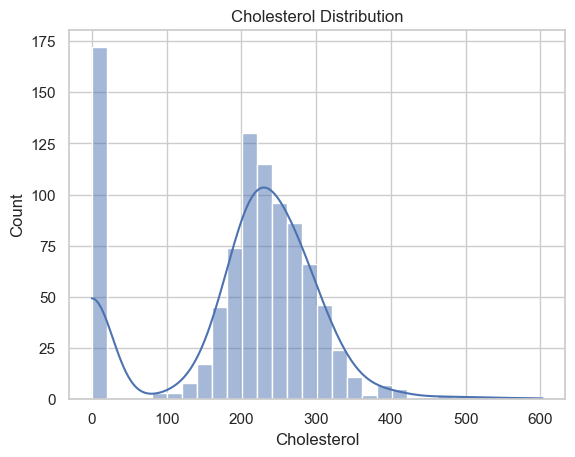

In [20]:
sns.histplot(data=df, x='Cholesterol', bins=30, kde=True)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()


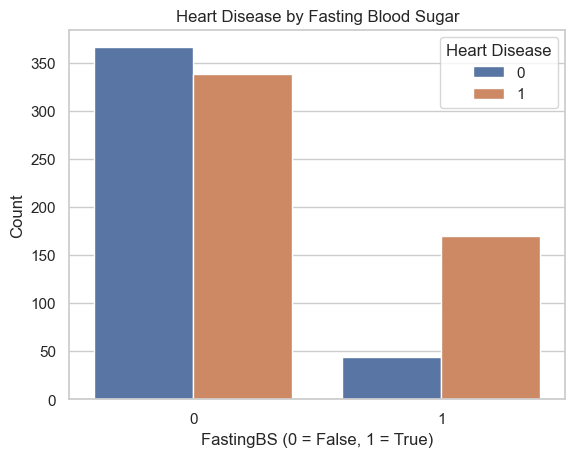

In [21]:
sns.countplot(x='FastingBS', hue='HeartDisease', data=df)
plt.title("Heart Disease by Fasting Blood Sugar")
plt.xlabel("FastingBS (0 = False, 1 = True)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


In [3]:
from scipy.stats import ttest_ind

# Create two groups: with and without heart disease
group_0 = df[df['HeartDisease'] == 0]
group_1 = df[df['HeartDisease'] == 1]

In [4]:
# Select only numerical columns (excluding target)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('HeartDisease')

# Store results
ttest_results = []

for col in numeric_cols:
    stat, p = ttest_ind(group_0[col], group_1[col], equal_var=False)
    ttest_results.append((col, stat, p))

# Convert to DataFrame for better view
ttest_df = pd.DataFrame(ttest_results, columns=['Feature', 'T-statistic', 'P-value'])
ttest_df.sort_values('P-value', inplace=True)
ttest_df


,Feature,T-statistic,P-value
5,Oldpeak,-14.040031,1.902722e-40
4,MaxHR,13.231478,1.430637e-36
0,Age,-8.822540,6.348337e-18
3,FastingBS,-8.760286,9.852286e-18
2,Cholesterol,7.626851,6.481236e-14
1,RestingBP,-3.339492,8.732265e-04


In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [7]:
from sklearn.preprocessing import StandardScaler

# Drop target column temporarily
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return acc, f1

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree Results:")
evaluate_model(dt_model, X_test, y_test)

Decision Tree Results:
Accuracy: 0.7935
F1 Score: 0.8190

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        82
           1       0.80      0.84      0.82       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



(0.7934782608695652, 0.819047619047619)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors Results:")
evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors Results:
Accuracy: 0.8859
F1 Score: 0.8986

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



(0.8858695652173914, 0.8985507246376812)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Results:")
evaluate_model(rf_model, X_test, y_test)

Random Forest Results:
Accuracy: 0.8750
F1 Score: 0.8878

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



(0.875, 0.8878048780487805)

In [16]:
models = ['Decision Tree', 'KNN', 'Random Forest']
accuracies = [0.7935, 0.8859, 0.8750]  
f1_scores = [0.8190, 0.8986, 0.8878]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores
}).sort_values(by='F1 Score', ascending=False)

comparison_df


,Model,Accuracy,F1 Score
1,KNN,0.8859,0.8986
2,Random Forest,0.8750,0.8878
0,Decision Tree,0.7935,0.8190


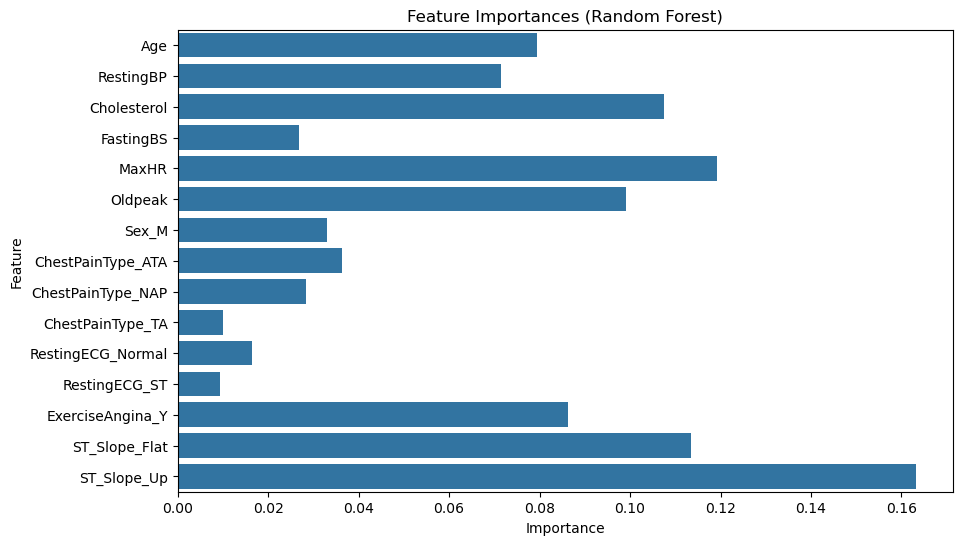

In [17]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 1. Which model performed best?
After applying several supervised machine learning algorithms (Decision Tree, K-Nearest Neighbors and Random Forest), the K-Nearest Neighbors (KNN) algorithm achieved the best performance on the test set.

Accuracy: 88.59%

F1 Score: 89.86%

The model provided a high balance between precision and recall, especially for detecting individuals with heart disease (recall = 91%), which is crucial in medical decision-making.

# 2. Which features were the most influential?
According to the Random Forest feature importance analysis, the following variables had the greatest impact on predicting heart disease:

ST_Slope_Up (Slope of the peak exercise ST segment)

ST_Slope_Flat

MaxHR (Maximum Heart Rate Achieved)

Cholesterol

Oldpeak (ST Depression induced by exercise)

These variables are medically known to be associated with cardiovascular health.
For example:

ST segment abnormalities are closely linked to myocardial ischemia.

MaxHR and Oldpeak are widely used in stress tests.

Cholesterol is a well-known cardiovascular risk factor.

This supports the validity and interpretability of our model.

# 3. What do the results tell us?
The results show that:

It is possible to predict heart disease risk with high accuracy using basic medical indicators and supervised learning models.

Models like KNN can distinguish between at-risk and healthy individuals with high precision and sensitivity.

Feature selection and preprocessing significantly affect model performance.

In particular, the t-test showed that variables such as age, cholesterol, and resting blood pressure were statistically significantly different between people with and without heart disease.

# 4. Where can this model be used?
This predictive model can be used in:

Health screening applications, to identify individuals at high risk of heart disease before costly and invasive tests are required.

Clinical decision support systems, to assist doctors in assessing heart disease probability.

Mobile health apps, as part of early warning or monitoring systems for heart health.

However, it must be emphasized that:

This model should not replace a medical diagnosis.

The data used is publicly available and may not reflect population-specific factors.

Before real-world use, the model should be validated on larger and more diverse datasets.

## Final Note
This project demonstrates the full pipeline of a data science project: from data cleaning, statistical analysis, modeling, evaluation, to interpretation. It provides a foundation for future improvements such as hyperparameter tuning, cross-validation, or even deep learning applications.